# Credit Score Classification

# 1. Overview

In [20]:
!pip install missingno 

Defaulting to user installation because normal site-packages is not writeable


In [21]:
import missingno as msno

In [22]:
import pandas as pd
import numpy as np

In [23]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText # for text annotation in plt plots
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, roc_curve

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [24]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [25]:
from xgboost import XGBClassifier

In [26]:
df=pd.read_csv(r'C:\Users\pratik rao\Desktop\Practical sample\credit_score.csv',low_memory=False)

In [27]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [30]:
df.shape

(100000, 28)

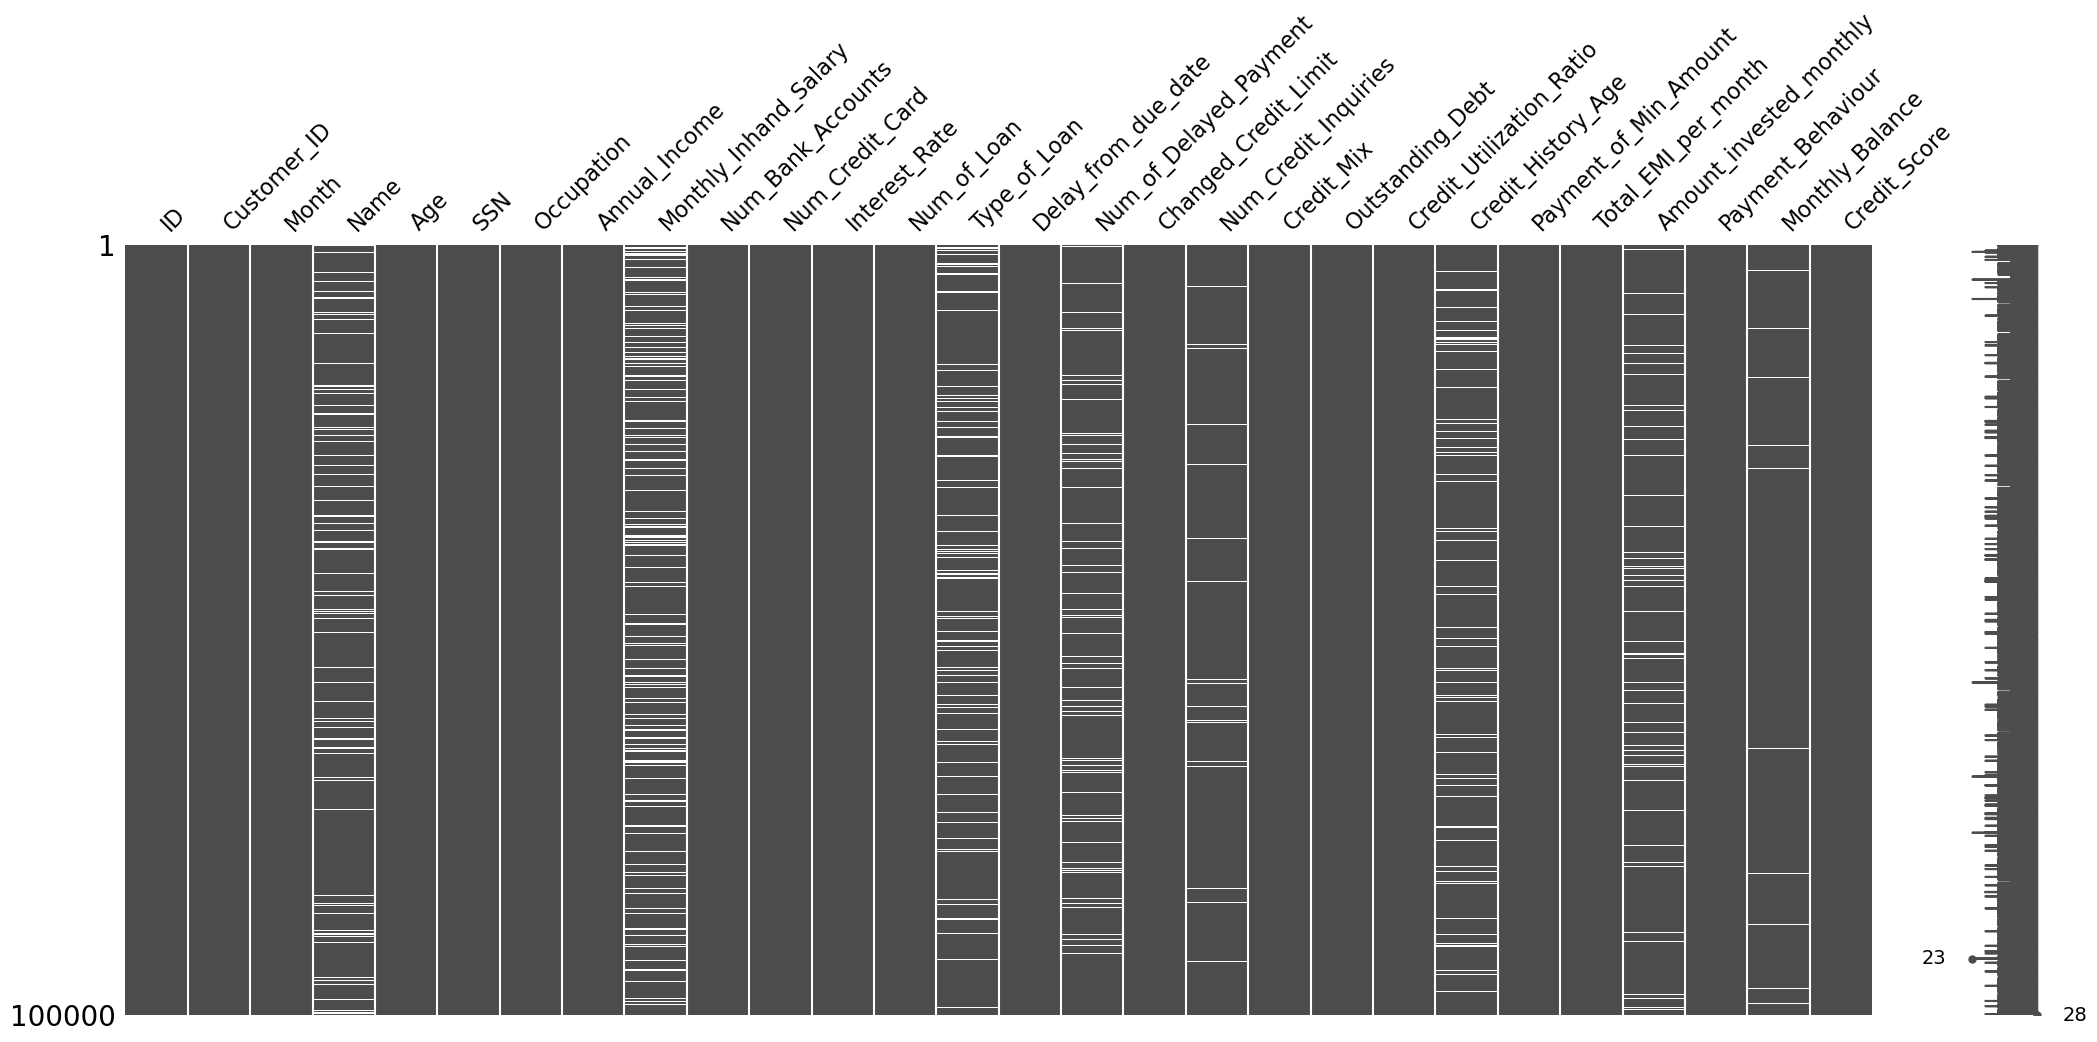

In [31]:
msno.matrix(df, color = (0.3, 0.3, 0.3));

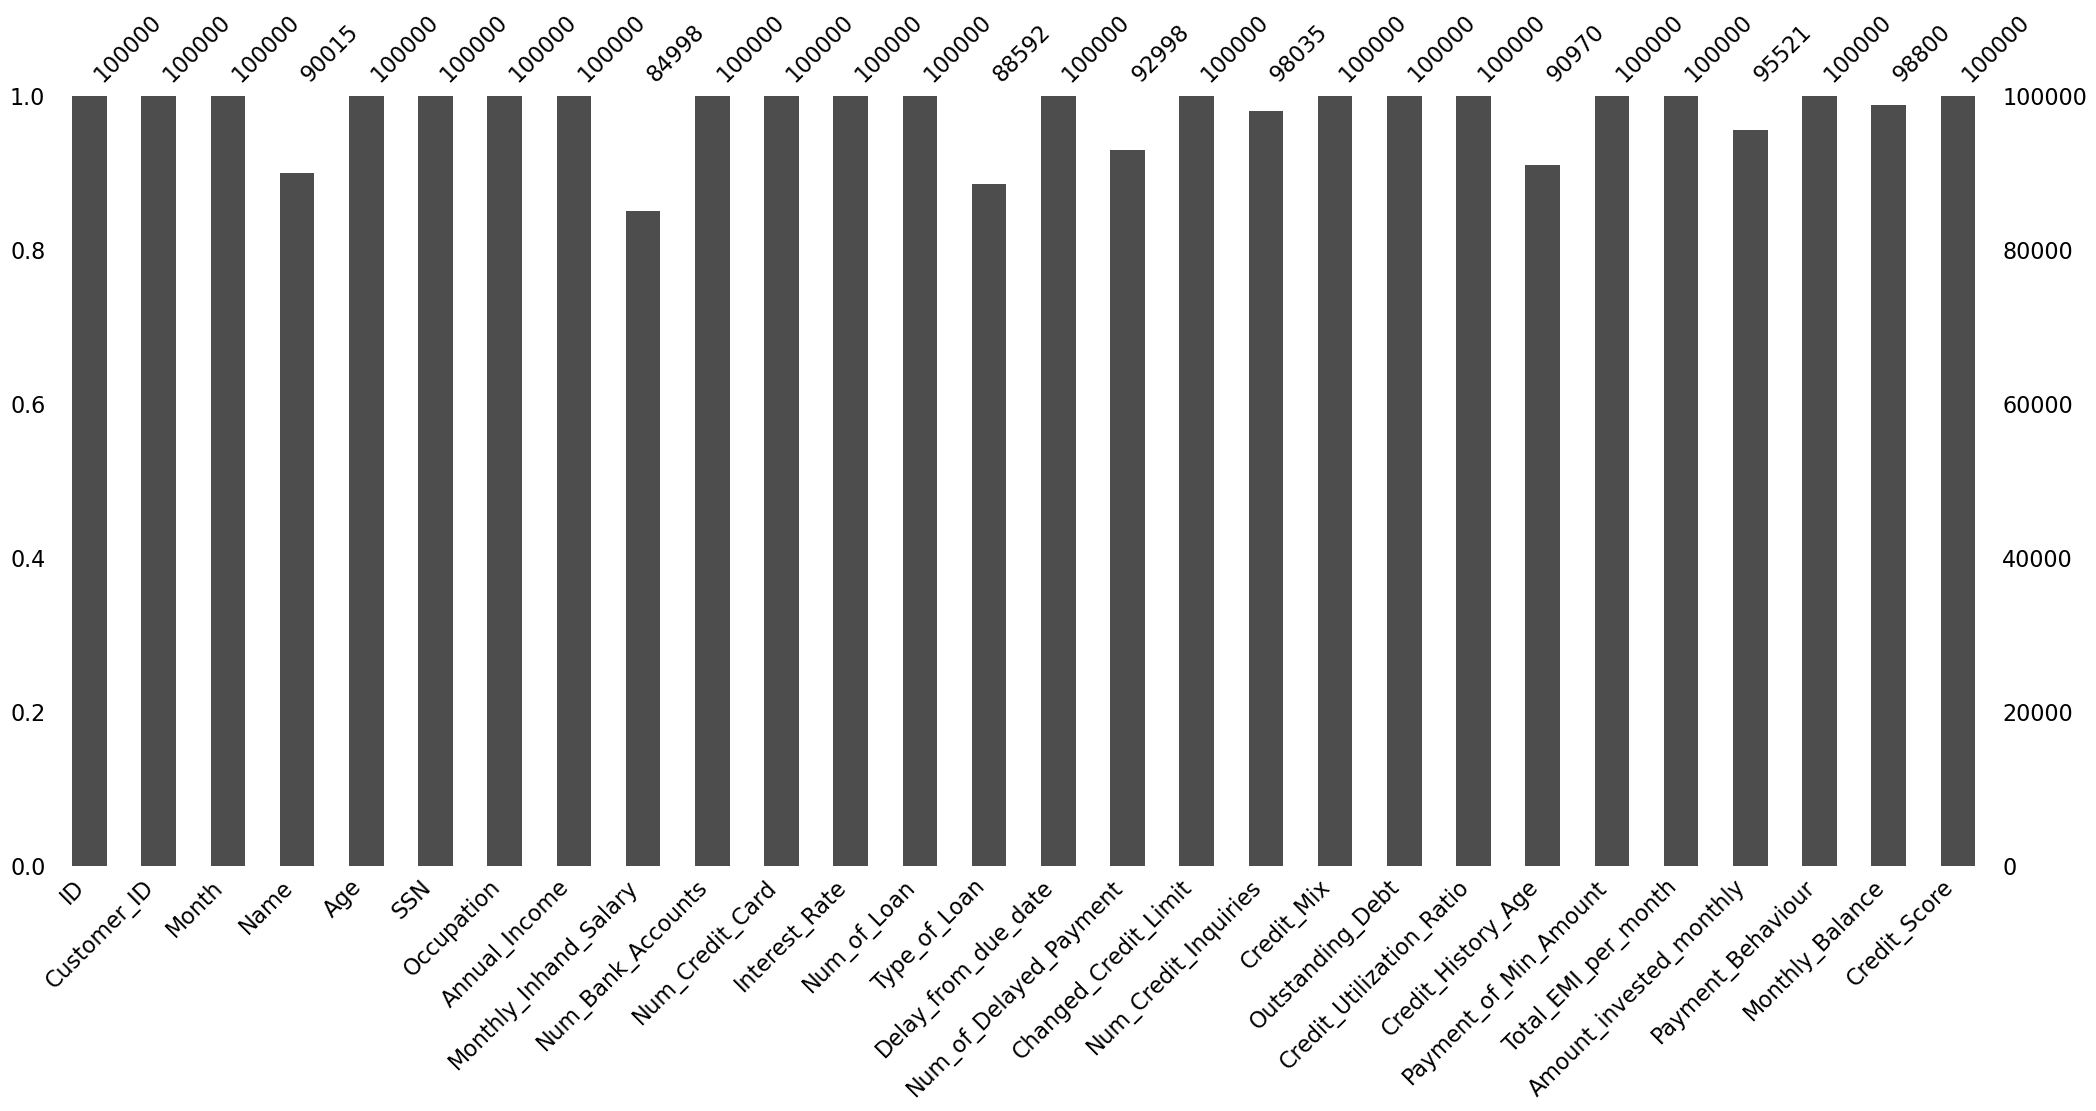

In [32]:
msno.bar(df, color = (0.3, 0.3, 0.3));

# 2. data wrangling and cleansing
Data type transformation

'Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Amount_invested_monthly', 'Outstanding_Debt' , 'Monthly_Balance' --> str to numeric

Credit_History_Age --> Credit_History_Months (str to numeric)

## Categorical features cleansing
Payment_of_Min_Amount --> 'NM' to 'No'

Payment_Behaviour --> replace

Occupation --> replace

Credit_Mix --> replace

### Numeric features cleansing
un-realistic values

### drop columns
ID, Month, Name, SSN, Credit_History_Age, Type_of_Loan

## 3. missing data imputation
numeric
categorical

## 4. EDA
categorical features vs. target

numerical features vs. target

## 5. feature engineering
potential outliers: Num_Credit_Card, Num_Bank_Accounts have large values --> keep for now

target variable --> ordinal encoding

numeric features --> normalization

categorical features --> onehot/ordinal encoding

PCA

## 6. model building
KNN

SVC

random forest

xgboost

In [33]:
credit = df.copy()

In [34]:
credit.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [35]:
credit.select_dtypes('O').columns.tolist()

['ID',
 'Customer_ID',
 'Month',
 'Name',
 'Age',
 'SSN',
 'Occupation',
 'Annual_Income',
 'Num_of_Loan',
 'Type_of_Loan',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_Score']

## 2. data wrangling and cleansing

Data type transformation

In [36]:
### fix some numeric features dtype
num_feats_fix = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment',
                 'Changed_Credit_Limit', 'Amount_invested_monthly',
                 'Outstanding_Debt']

In [37]:
credit.Num_of_Delayed_Payment[[isinstance(x,str) for x in credit.Num_of_Delayed_Payment]]

0         7
2         7
3         4
5         4
6        8_
         ..
99994     6
99995     7
99996     7
99997     6
99999     6
Name: Num_of_Delayed_Payment, Length: 92998, dtype: object

In [38]:
def extract_num(val):
    try:
        return float(val.replace("_", ""))
    except:
        return np.nan

for feat in num_feats_fix:
    credit[feat] = df[feat].apply(extract_num)

In [39]:
# fix column Monthly_Balance
# data.monthly_balance = data.monthly_balance.astype(float)
#  '__-333333333333333333333333333__' causes an error!
# credit['Monthly_Balance'] = df['Monthly_Balance']
credit.loc[credit.Monthly_Balance=='__-333333333333333333333333333__','Monthly_Balance'] = 0
credit.Monthly_Balance = credit.Monthly_Balance.astype(float)

In [40]:
# fix column Credit_History_Age
def get_credit_hist_months(x):
    '''x is a list'''
    try:
        return float(x[0])*12 + float(x[1])
    except:
        return np.nan

In [41]:
credit['Credit_History_Months'] = (credit.Credit_History_Age.str
                                   .findall('[0-9]{1,2}')
                                   .apply(get_credit_hist_months))

## Categorical features

In [42]:
# fix column Payment_of_Min_Amount
credit['Payment_of_Min_Amount'].value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

In [43]:
credit['Payment_of_Min_Amount'].replace("NM","No",inplace=True)

In [44]:
credit['Payment_of_Min_Amount'].value_counts()

Yes    52326
No     47674
Name: Payment_of_Min_Amount, dtype: int64

In [45]:
# fix Payment_Behaviour
credit.Payment_Behaviour.value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

In [46]:
credit['Payment_Behaviour'].replace("!@9#%8", np.nan, inplace=True)

In [47]:
# fix Occupation
credit.Occupation.value_counts()

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [48]:
for id in credit[credit['Occupation'] == "_______"]['Customer_ID'].unique() :
    oc = credit[(credit['Customer_ID'] == id) & (credit['Occupation'] != "_______")]['Occupation'].mode()[0]
    credit[credit['Customer_ID'] == id] = credit[credit['Customer_ID'] == id].replace("_______", oc)
# takes time

In [49]:
credit.Occupation.value_counts()

Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation, dtype: int64

In [50]:
# Type_of_Loan --> too many unique values --> drop
credit.Type_of_Loan.value_counts().head()

Not Specified              1408
Credit-Builder Loan        1280
Personal Loan              1272
Debt Consolidation Loan    1264
Student Loan               1240
Name: Type_of_Loan, dtype: int64

In [51]:
# fix Credit_Mix
credit.Credit_Mix.value_counts()

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

In [52]:
credit.Credit_Mix.replace('_', np.nan, inplace=True)

In [53]:
for id in credit[credit['Credit_Mix'].isna()]['Customer_ID'].unique() :
    cm = credit[(credit['Customer_ID'] == id) & (credit['Credit_Mix'].notna())]['Credit_Mix'].mode()[0]
    credit[credit['Customer_ID'] == id] = credit[credit['Customer_ID'] == id].fillna({'Credit_Mix': cm})
# takes time

In [54]:
credit.Credit_Mix.value_counts()

Standard    45848
Good        30384
Bad         23768
Name: Credit_Mix, dtype: int64

## Numeric features

In [56]:
credit.select_dtypes(exclude='object').isna().sum()

Age                             0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Monthly_Balance              1200
Credit_History_Months        9030
dtype: int64

In [57]:
credit.select_dtypes([int, float]).describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Months
count,100000.000000,1.000000e+05,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,92998.000000,97909.000000,98035.000000,100000.000000,100000.000000,100000.000000,95521.000000,98800.000000,90970.000000
mean,110.649700,1.764157e+05,4194.170850,17.091280,22.47443,72.466040,3.009960,21.068780,30.923342,10.389025,27.754251,1426.220376,32.285173,1403.118217,637.412998,402.514588,221.195405
std,686.244717,1.429618e+06,3183.686167,117.404834,129.05741,466.422621,62.647879,14.860104,226.031892,6.789496,193.177339,1155.129026,5.116875,8306.041270,2043.319327,213.950252,99.741364
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,0.000000,1.000000
25%,24.000000,1.945750e+04,1625.568229,3.000000,4.00000,8.000000,1.000000,10.000000,9.000000,5.320000,3.000000,566.072500,28.052567,30.306660,74.534002,270.092209,144.000000
50%,33.000000,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.155000,32.305784,69.249473,135.925682,336.719190,219.000000
75%,42.000000,7.279092e+04,5957.448333,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.870000,9.000000,1945.962500,36.496663,161.224249,265.731733,470.220186,302.000000
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,1602.040519,404.000000


## drop columns
ID, Month, Name, SSN, Credit_History_Age, Type_of_Loan

In [58]:
credit.drop(['ID', 'Month', 'Name', 'SSN', 'Credit_History_Age', 'Type_of_Loan'], axis=1, inplace=True)

## un-realistic values in numeric features
Age

In [59]:
### Age
credit[(credit.Age <= 0) | (credit.Age > 120)]

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Months
2,CUS_0xd40,-500.0,Scientist,19114.12,NaN,3,4,3,4.0,3,...,Good,809.98,28.609352,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,267.0
56,CUS_0x5407,7580.0,Media_Manager,34081.38,NaN,8,7,15,3.0,30,...,Standard,1704.18,24.448063,No,70.478333,162.441009,Low_spent_Large_value_payments,298.192158,Poor,NaN
113,CUS_0xff4,-500.0,Entrepreneur,25546.26,NaN,8,7,14,5.0,16,...,Standard,758.44,29.711376,Yes,101.328637,300.323232,Low_spent_Small_value_payments,129.933631,Standard,219.0
122,CUS_0x33d2,181.0,Scientist,31993.78,2942.148333,6,6,7,2.0,8,...,Standard,818.22,27.380109,Yes,45.141298,264.257089,Low_spent_Small_value_payments,274.816447,Standard,204.0
219,CUS_0x3edc,995.0,Accountant,43070.24,3622.186667,3,3,18,1.0,11,...,Standard,1233.10,24.331772,Yes,30.576085,74.920375,High_spent_Medium_value_payments,506.722207,Standard,233.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99913,CUS_0x1619,2263.0,Media_Manager,20059.98,1523.665000,8,5,12,4.0,25,...,Good,909.01,25.982154,No,45.076827,74.713580,High_spent_Small_value_payments,292.576093,Poor,196.0
99937,CUS_0xad4f,-500.0,Developer,22620.79,1722.065833,7,3,9,0.0,25,...,Standard,642.46,31.841872,No,0.000000,105.076293,Low_spent_Large_value_payments,337.130290,Standard,NaN
99950,CUS_0x51b3,1342.0,Media_Manager,59146.36,4908.863333,3,6,6,1.0,8,...,Good,418.03,38.199635,No,26.778419,502.376320,Low_spent_Small_value_payments,251.731594,Standard,247.0
99963,CUS_0x372c,-500.0,Lawyer,42903.79,NaN,0,4,6,1.0,14,...,Good,1079.48,30.625298,No,34.975457,31.193919,High_spent_Large_value_payments,520.662207,Standard,NaN


In [60]:
### check one particular Customer
credit[credit.Customer_ID == 'CUS_0xd40']

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Months
0,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,...,Good,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,265.0
1,CUS_0xd40,23.0,Scientist,19114.12,NaN,3,4,3,4.0,-1,...,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,NaN
2,CUS_0xd40,-500.0,Scientist,19114.12,NaN,3,4,3,4.0,3,...,Good,809.98,28.609352,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,267.0
3,CUS_0xd40,23.0,Scientist,19114.12,NaN,3,4,3,4.0,5,...,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,268.0
4,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,6,...,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,269.0
5,CUS_0xd40,23.0,Scientist,19114.12,NaN,3,4,3,4.0,8,...,Good,809.98,27.262259,No,49.574949,62.430172,NaN,340.479212,Good,270.0
6,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,...,Good,809.98,22.537593,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good,271.0
7,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,...,Good,809.98,23.933795,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard,NaN


In [61]:
credit['Age'] = credit.Age.apply(lambda val: val if 0 < val < 120 else np.nan)

In [62]:
for id in credit[credit['Age'].isna()]['Customer_ID'].unique() :
    age = credit[(credit['Customer_ID'] == id) & (credit['Age'].notna())]['Age'].mean()
    credit[credit['Customer_ID'] == id] = credit[credit['Customer_ID'] == id].fillna({'Age': age})
# takes time

In [63]:
credit['Age'].describe()

count    100000.000000
mean         33.319327
std          10.790693
min          14.000000
25%          24.000000
50%          33.000000
75%          42.000000
max         118.000000
Name: Age, dtype: float64

## 3. missing data imputation
numeric --> KNNImputer

categorical --> SimpleImputer

In [64]:
credit.shape

(100000, 23)

## numeric

In [65]:
### numeric
credit.select_dtypes([int, float]).isna().sum()[credit.select_dtypes([int, float]).isna().sum() > 0]

Monthly_Inhand_Salary      15002
Num_of_Delayed_Payment      7002
Changed_Credit_Limit        2091
Num_Credit_Inquiries        1965
Amount_invested_monthly     4479
Monthly_Balance             1200
Credit_History_Months       9030
dtype: int64

In [66]:
num_feats_impute = (credit.select_dtypes([int, float]).isna().sum()[credit.select_dtypes([int, float]).isna().sum() > 0]
                    .index.tolist())

In [67]:
num_feats_impute

['Monthly_Inhand_Salary',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Amount_invested_monthly',
 'Monthly_Balance',
 'Credit_History_Months']

In [68]:
### KNN imputing for numeric features
label_encoder = LabelEncoder()
knn_imputer = KNNImputer(n_neighbors=2)

In [69]:
### turn Customer_ID to numeric just for imputation
credit['CustomerID_num'] = label_encoder.fit_transform(credit.Customer_ID)

In [70]:
# neighbors are records with same Customer_ID
for feat in num_feats_impute:
    credit[['CustomerID_num', feat]] = knn_imputer.fit_transform(credit[['CustomerID_num', feat]])
# takes time

In [71]:
### safely drop Customer_ID and CustomerID_encoded after missing data imputation
credit.drop(['Customer_ID', 'CustomerID_num'], axis=1, inplace=True)

## categorical

In [72]:
### categorical
credit.select_dtypes('O').isna().sum()

Occupation                  0
Credit_Mix                  0
Payment_of_Min_Amount       0
Payment_Behaviour        7600
Credit_Score                0
dtype: int64

In [73]:
sim_imputer = SimpleImputer(strategy='most_frequent')
credit[['Payment_Behaviour']] = sim_imputer.fit_transform(credit[['Payment_Behaviour']])

In [74]:
### check dataframe
credit.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Months
0,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,7.0,...,Good,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,265.0
1,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,-1,7.0,...,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,266.0
2,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,7.0,...,Good,809.98,28.609352,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,267.0
3,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,5,4.0,...,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,268.0
4,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,6,7.0,...,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,269.0


In [75]:
credit.shape

(100000, 22)

In [76]:
credit.isna().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
Credit_History_Months       0
dtype: int64

In [77]:
# credit.to_csv('credit_for_EDA.csv')

# 4. EDA

target variable

categorical features

numeric features

## target variable¶

In [78]:
credit.Credit_Score.value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

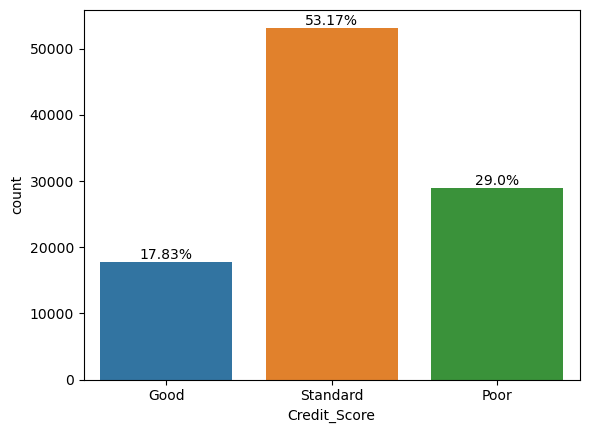

In [79]:
ax = sns.countplot(x='Credit_Score', data=credit)
bar_labels = list(map(lambda x: str(x) + '%', (credit.Credit_Score.value_counts()/credit.shape[0]*100).values.round(2)))
ax.bar_label(container=ax.containers[0], labels=[bar_labels[2], bar_labels[0], bar_labels[1]]);

## categorical features

In [80]:
credit.select_dtypes('O').columns

Index(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

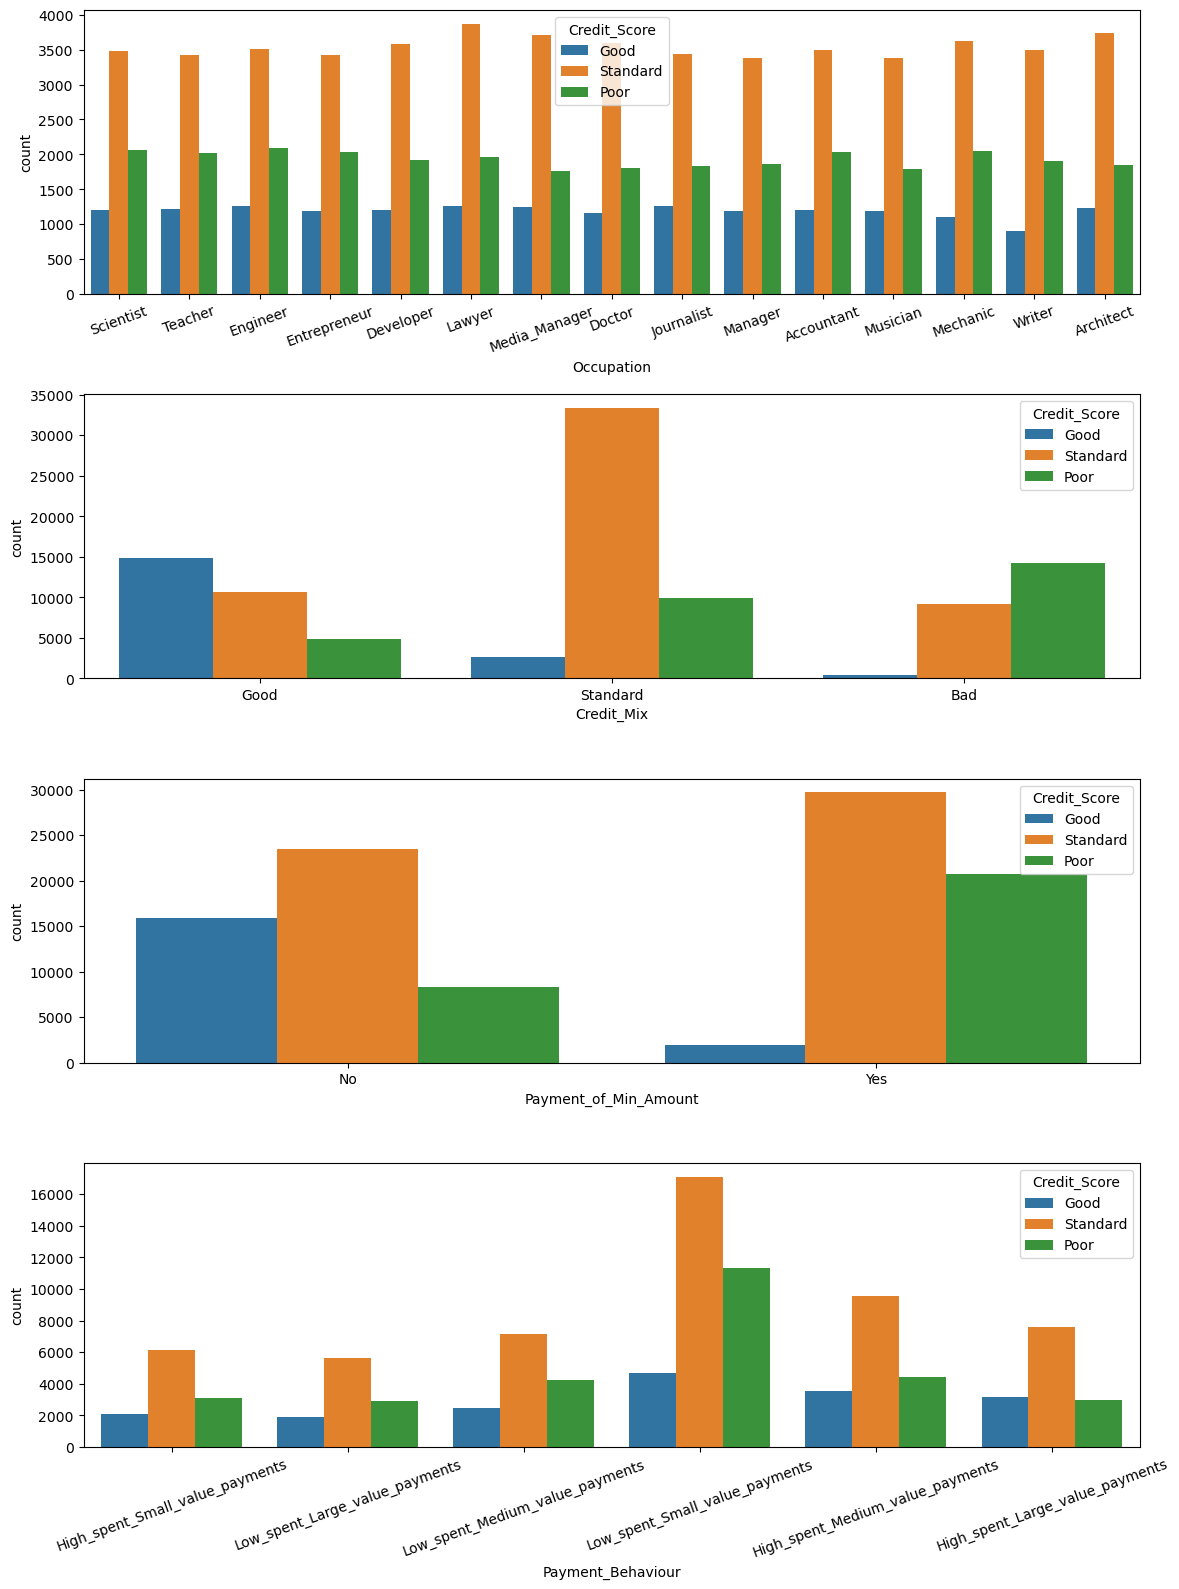

In [81]:
cat_feat_lst = credit.select_dtypes('O').columns.tolist()[:-1]

fig, axs = plt.subplots(4, 1, figsize = (12, 16))
axs = axs.flatten()
for i, feat in enumerate(cat_feat_lst):
    sns.countplot(x = feat, data = credit,
                  hue='Credit_Score', ax = axs[i])
    if i in [0, 3]:
        axs[i].tick_params(axis='x', rotation = 20)
plt.tight_layout()

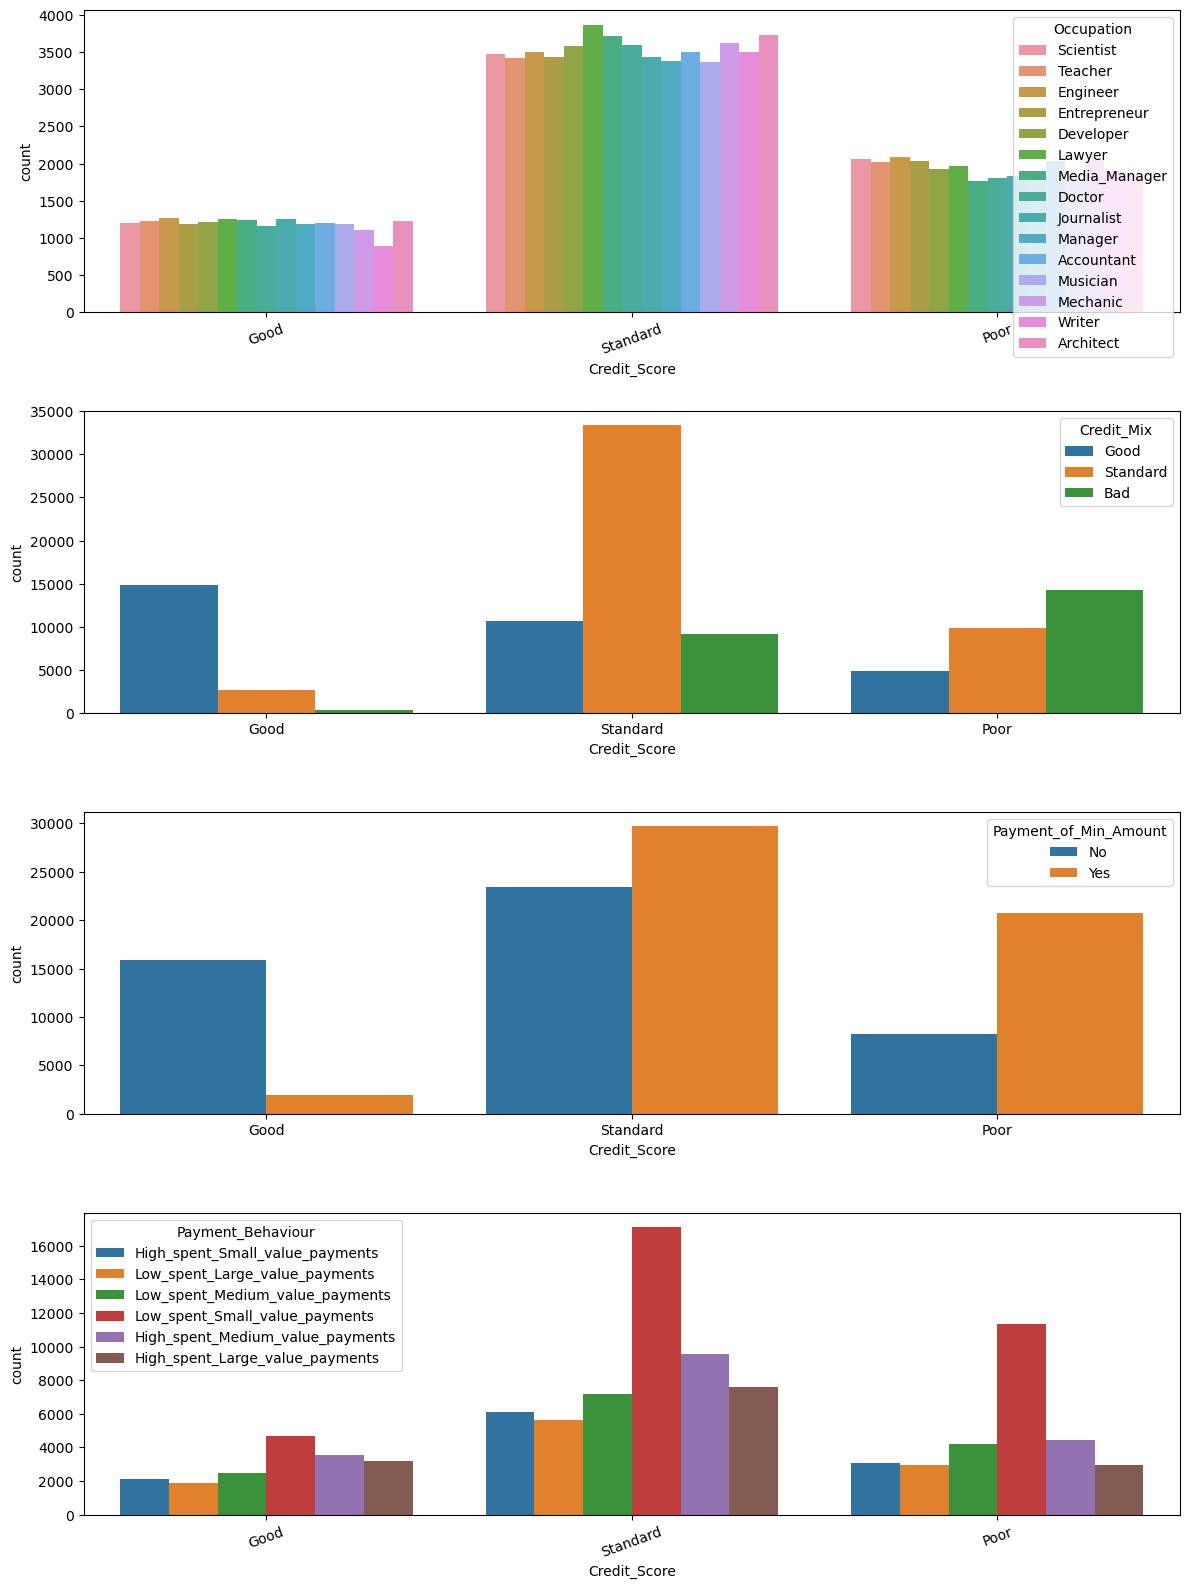

In [82]:
cat_feat_lst = credit.select_dtypes('O').columns.tolist()[:-1]

fig, axs = plt.subplots(4, 1, figsize = (12, 16))
axs = axs.flatten()
for i, feat in enumerate(cat_feat_lst):
    sns.countplot(x = 'Credit_Score', data = credit,
                  hue=feat, ax = axs[i])
    if i in [0, 3]:
        axs[i].tick_params(axis='x', rotation = 20)
plt.tight_layout()

## numeric features

In [83]:
credit.select_dtypes(exclude='O').columns.tolist()

['Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance',
 'Credit_History_Months']

In [84]:
# all numeric features
feat_lst = credit.select_dtypes(exclude='O').columns.tolist()

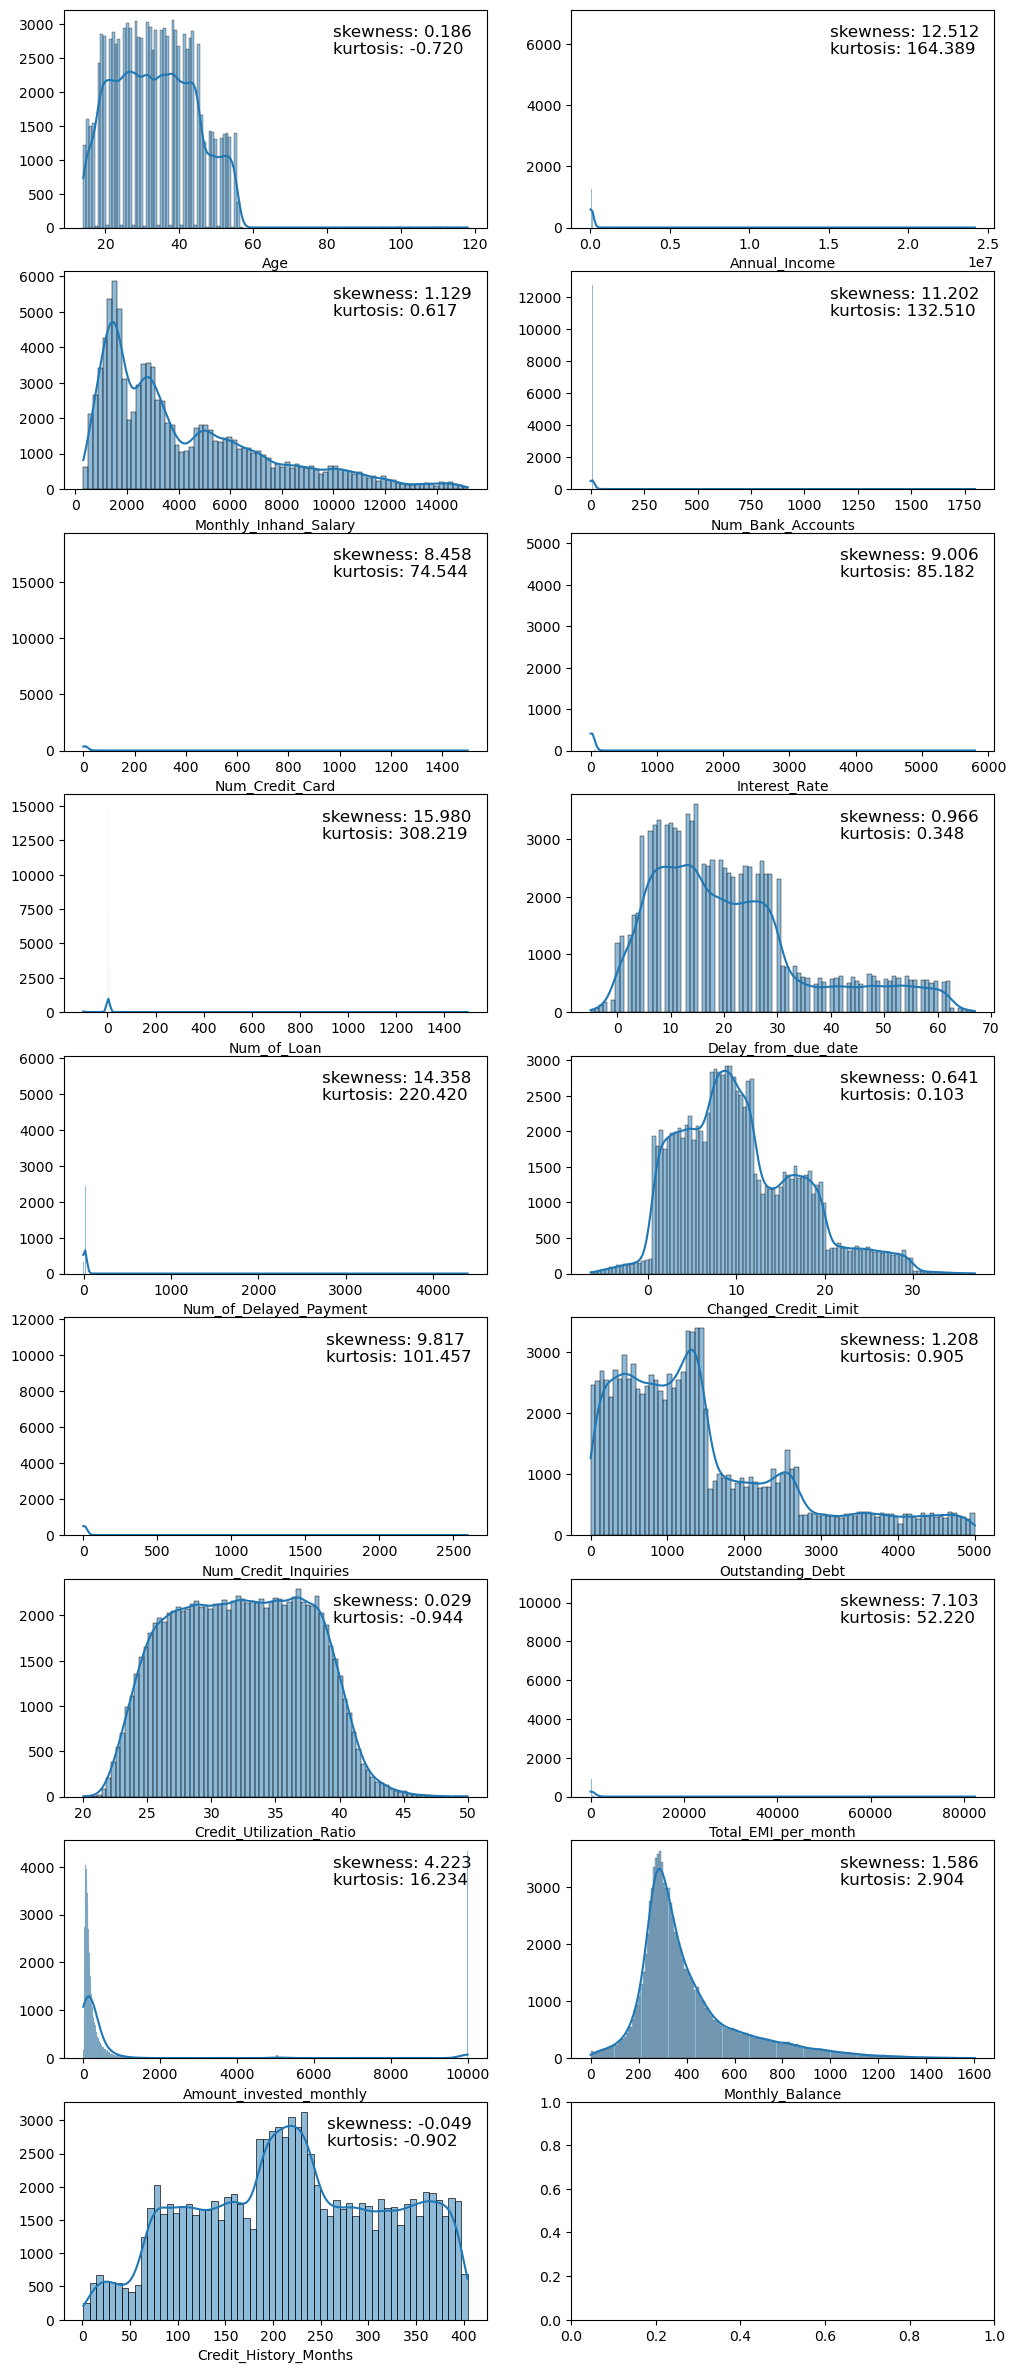

In [85]:
skew = credit[feat_lst].skew() # skewness of features
kurt = credit[feat_lst].kurt() # kurtosis of features

fig, axs = plt.subplots(9, 2, figsize = (12, 30))
axs = axs.flatten()
for i, feat in enumerate(feat_lst):
    sns.histplot(x = feat, data = credit,
#                  bins = 20,
                 kde = True,
#                  hue='Credit_Score',
#                  line_kws = {'color': '#ff7f0e', 'lw': 3, 'ls': '--'},
                 ax=axs[i])
    axs[i].set(ylabel='')
    text = 'skewness: {:.3f}\nkurtosis: {:.3f}'.format(skew[feat], kurt[feat])
    anchored_text = AnchoredText(text, loc = 'upper right', prop=dict(size=12), frameon=False)
    axs[i].add_artist(anchored_text)

### takes a while to generate the plot

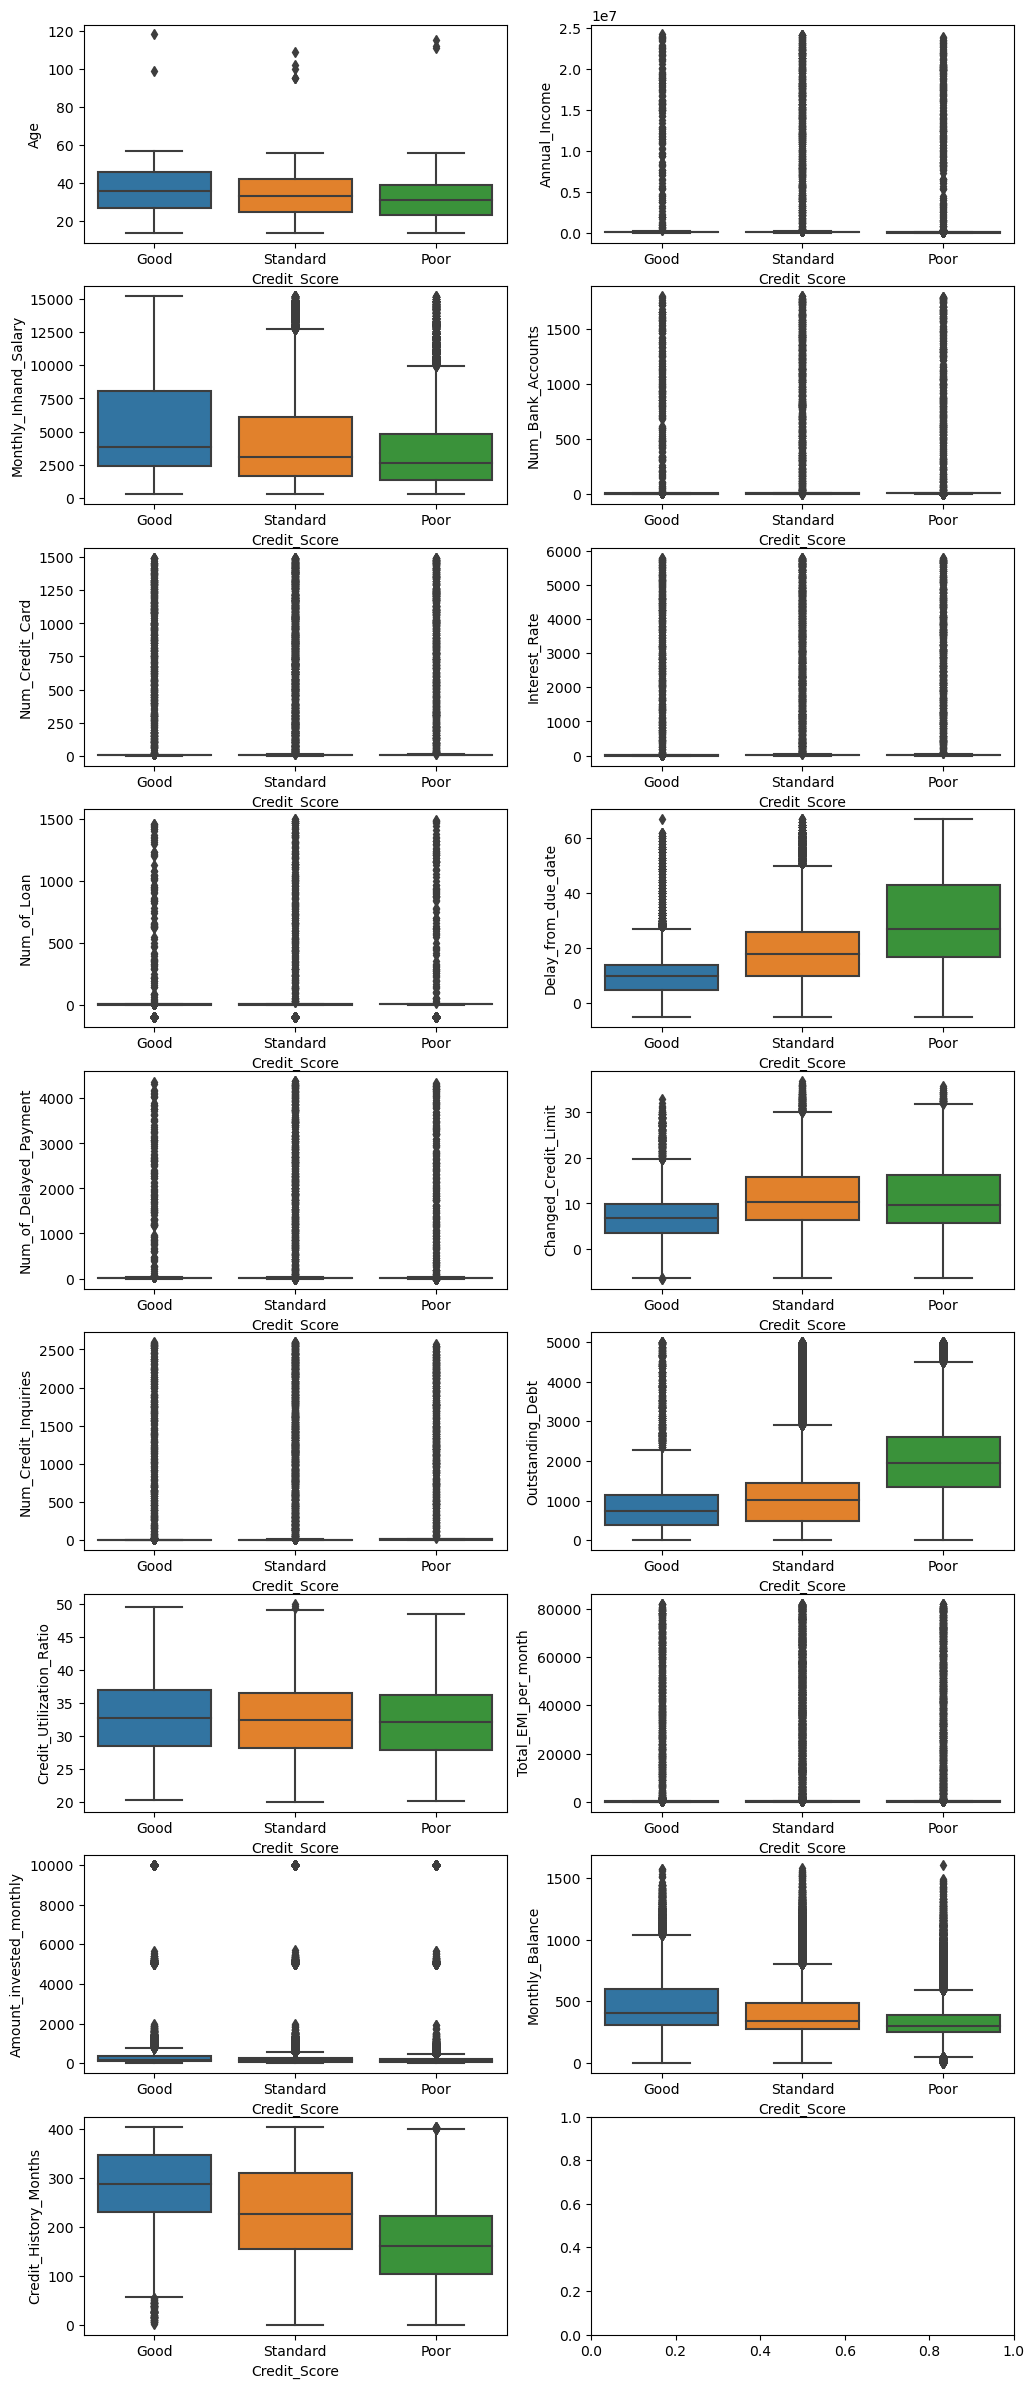

In [86]:
# box plot
fig, axs = plt.subplots(9, 2, figsize = (12, 30))
axs = axs.flatten()
for i, feat in enumerate(feat_lst):
    sns.boxplot(x = 'Credit_Score', y = feat, data = credit,
                ax = axs[i])

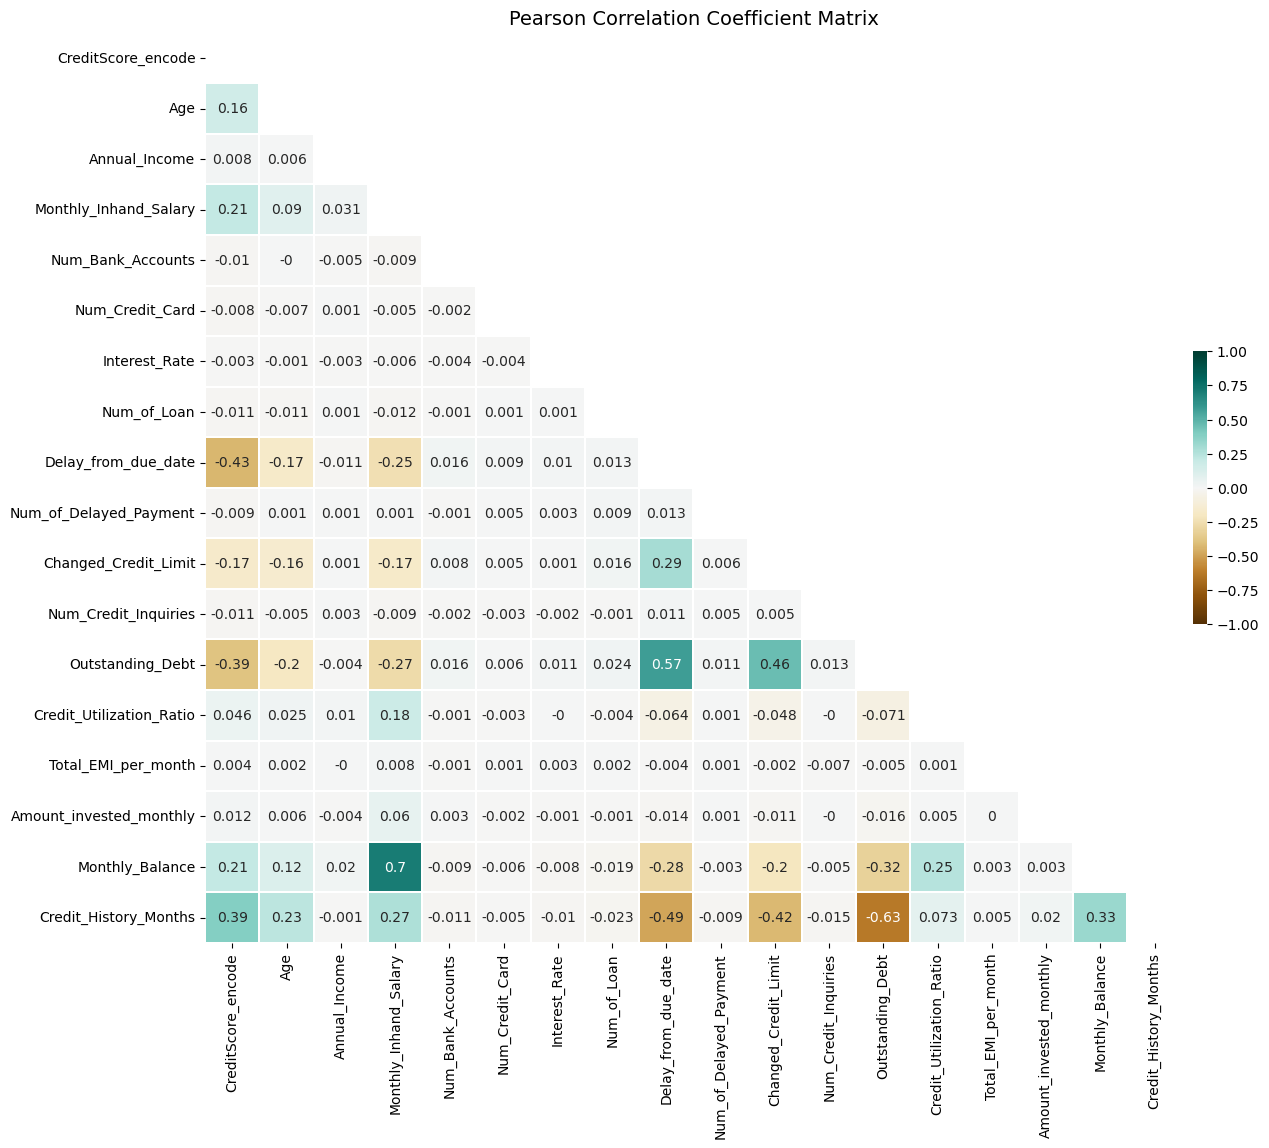

In [87]:
# pearson correlation coefficient matrix
# encode target variable first
df_for_corr = credit.copy()
df_for_corr['CreditScore_encode'] = df_for_corr.Credit_Score.replace({'Poor': 0, 'Standard': 1, 'Good': 2})
feat_corr = df_for_corr[['CreditScore_encode'] + feat_lst].corr().round(3)

plt.figure(figsize=(15, 13))
mask = np.triu(np.ones_like(feat_corr, dtype=bool))
sns.heatmap(feat_corr, mask=mask,
            vmin=-1, vmax=1,
            annot=True, annot_kws={"fontsize": 10},
            cbar=True,
            cbar_kws={'shrink': 0.3, 'pad': 0.01},
            cmap = 'BrBG', linewidth=0.1)
plt.title('Pearson Correlation Coefficient Matrix', fontsize=14)
plt.subplots_adjust(bottom=0.18)

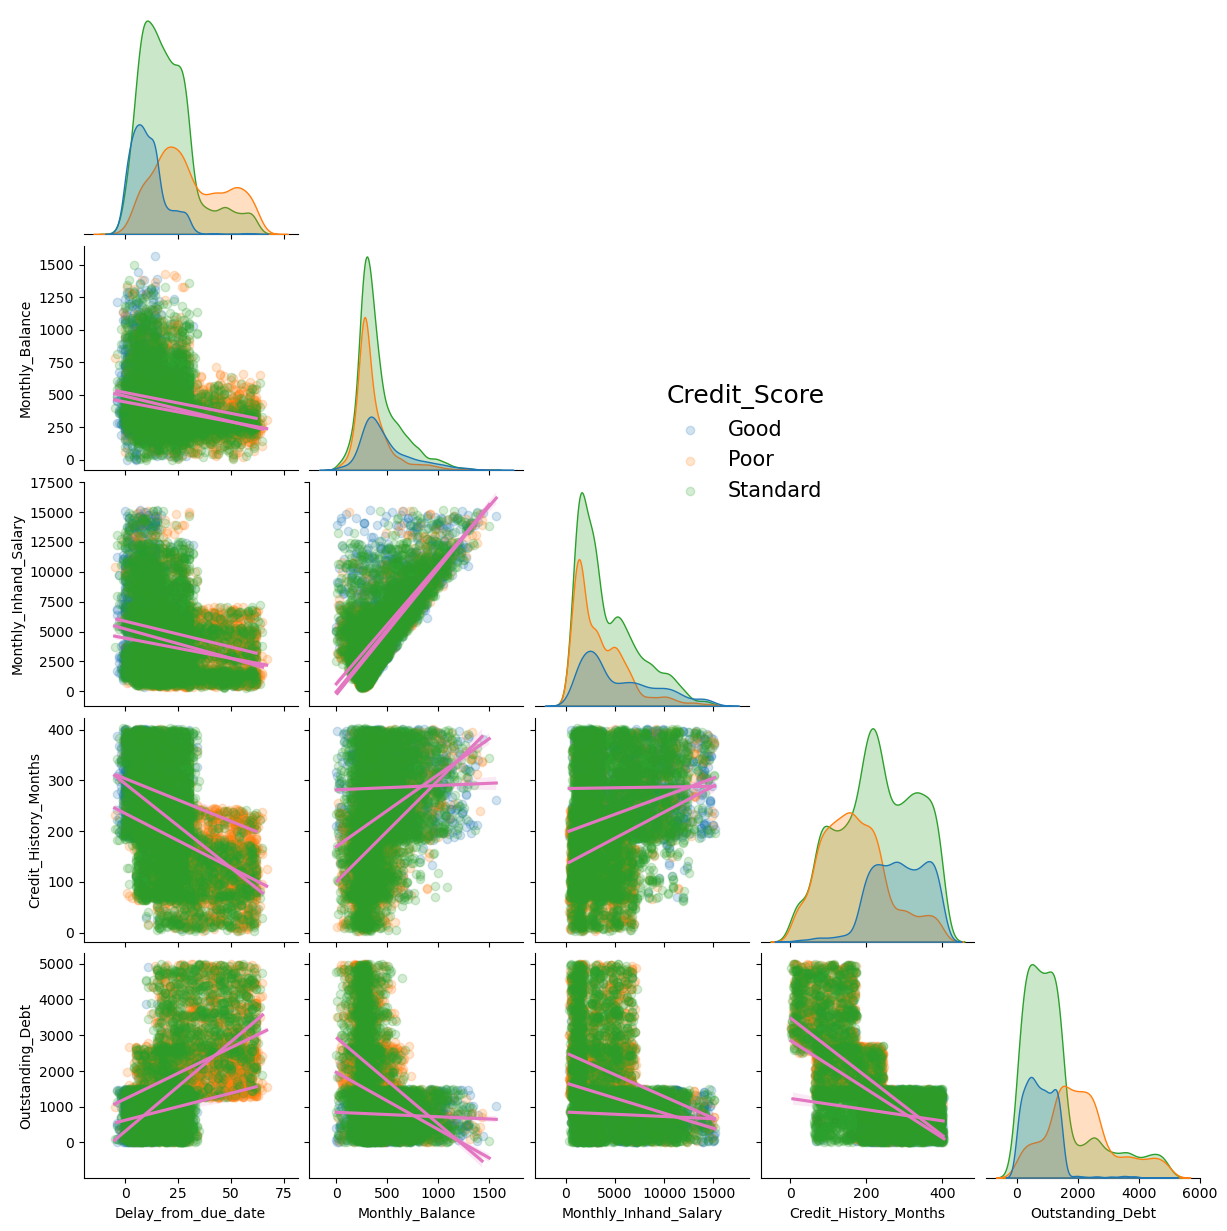

In [88]:
# scatter plot matrix with sampled dataframe, and selected numeric features
# sample a small subset of dataframe with stratifying
credit_sample = (credit.groupby('Credit_Score', as_index=False, group_keys=False)
                 .apply(lambda x: x.sample(frac=0.1, random_state=0)))
# select subset of numeric features to examine
feat_lst_sub = ['Delay_from_due_date', 'Monthly_Balance', 'Monthly_Inhand_Salary',
                'Credit_History_Months', 'Outstanding_Debt']

with sns.plotting_context(rc={'axes.labelsize': 10,
                              'legend.fontsize': 15,
                              'legend.title_fontsize': 18}):
    f = sns.pairplot(credit_sample[feat_lst_sub + ['Credit_Score']],
                     hue='Credit_Score',
                     kind='reg', corner=True,
                     plot_kws={'line_kws':{'color':'#e377c2'},
                               'scatter_kws': {'alpha': 0.2, 'marker': '+'}});

    sns.move_legend(f, "upper right", bbox_to_anchor=(0.6, 0.7))

## 5. feature engineering
make a new copy of dataframe

target variable --> ordinal encoding

categorical features --> onehot/ordinal encoding

train-test split

numeric features --> normalization

PCA (?)

## target variable encoding

In [89]:
# target variable
credit_fe = credit.copy()
credit_fe['CreditScore_encode'] = credit_fe.Credit_Score.replace({'Poor': 0, 'Standard': 1, 'Good': 2})

In [90]:
credit_fe.drop('Credit_Score', axis=1, inplace=True)

In [91]:
credit_fe.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_History_Months,CreditScore_encode
0,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,7.0,...,Good,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,265.0,2
1,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,-1,7.0,...,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,266.0,2
2,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,7.0,...,Good,809.98,28.609352,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,267.0,2
3,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,5,4.0,...,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,268.0,2
4,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,6,7.0,...,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,269.0,2


In [92]:
### make sure no missing values exist
credit_fe.isna().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_History_Months       0
CreditScore_encode          0
dtype: int64

## categorical features
0/1 replacement: Payment_of_Min_Amount

ordinal encoding: Credit_Mix

nominal onehot encoding: Occupation, Payment_Behaviour

In [93]:
credit_fe.select_dtypes('O').columns

Index(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour'],
      dtype='object')

In [94]:
# 0/1 replacement: Payment_of_Min_Amount
credit_fe['Payment_of_Min_Amount_encode'] = (credit_fe.Payment_of_Min_Amount
                                             .apply(lambda val: 1 if val == 'Yes' else 0))

In [95]:
credit_fe.Payment_of_Min_Amount.value_counts()

Yes    52326
No     47674
Name: Payment_of_Min_Amount, dtype: int64

In [96]:
credit_fe.Payment_of_Min_Amount_encode.value_counts()

1    52326
0    47674
Name: Payment_of_Min_Amount_encode, dtype: int64

In [97]:
# ordinal encoding: Credit_Mix
credit_fe['Credit_Mix_encode'] = (credit_fe.Credit_Mix
                                  .replace({'Bad': 0, 'Standard': 1, 'Good': 2}))

In [98]:
credit_fe.Credit_Mix.value_counts()

Standard    45848
Good        30384
Bad         23768
Name: Credit_Mix, dtype: int64

In [99]:
credit_fe.Credit_Mix_encode.value_counts()

1    45848
2    30384
0    23768
Name: Credit_Mix_encode, dtype: int64

In [100]:
### drop original columns: Payment_of_Min_Amount, Credit_Mix
credit_fe.drop(['Payment_of_Min_Amount', 'Credit_Mix'], axis=1, inplace=True)

In [101]:
credit_fe.select_dtypes('O').columns

Index(['Occupation', 'Payment_Behaviour'], dtype='object')

In [102]:
# nominal onehot encoding: Occupation, Payment_Behaviour --> pandas.get_dummies
credit_encode_full = pd.get_dummies(credit_fe, drop_first=True)

In [103]:
credit_encode_full.shape

(100000, 39)

In [104]:
### data frame with all numeric features
# credit_encode_full.to_csv('credit_encode_full.csv')

## train-test split
use dataframe credit_encode_full

In [105]:
credit_encode_full.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,23.0,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,...,0,0,1,0,0,0,1,0,0,0
1,23.0,19114.12,1824.843333,3,4,3,4.0,-1,7.0,11.27,...,0,0,1,0,0,0,0,1,0,0
2,23.0,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,...,0,0,1,0,0,0,0,0,1,0
3,23.0,19114.12,1824.843333,3,4,3,4.0,5,4.0,6.27,...,0,0,1,0,0,0,0,0,0,1
4,23.0,19114.12,1824.843333,3,4,3,4.0,6,7.0,11.27,...,0,0,1,0,0,1,0,0,0,0


In [106]:
feats_all = [feat for feat in credit_encode_full.columns if feat != 'CreditScore_encode']

In [107]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(credit_encode_full[feats_all],
                                                    credit_encode_full['CreditScore_encode'],
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=credit_encode_full['CreditScore_encode'])

In [108]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80000, 38), (20000, 38), (80000,), (20000,))

## feature engineering numeric features
StandardScaler

fit_transform on training data

transform on test data

In [110]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [111]:
X_test_scaled = scaler.transform(X_test)

### PCA 

In [112]:
# perform PCA
pca = PCA(random_state=0)
X_train_pca = pca.fit_transform(X_train_scaled)

In [113]:
pca.explained_variance_ratio_

array([0.11080788, 0.0440833 , 0.03302052, 0.0303609 , 0.02983718,
       0.02851439, 0.02838397, 0.02834138, 0.02832219, 0.0283062 ,
       0.02827049, 0.02825678, 0.02821633, 0.0282021 , 0.02817654,
       0.02816519, 0.028105  , 0.02810258, 0.0278339 , 0.0265506 ,
       0.0265291 , 0.02640905, 0.02632197, 0.02616065, 0.02613994,
       0.02606058, 0.02595423, 0.02575539, 0.02385605, 0.02246316,
       0.01968135, 0.01550644, 0.01256779, 0.00869777, 0.00758867,
       0.00526284, 0.00330131, 0.00188628])

In [114]:
# get Cumulative variance and plot
var_cumsum = np.cumsum(np.round(pca.explained_variance_ratio_, 4)*100)
print(var_cumsum)

[ 11.08  15.49  18.79  21.83  24.81  27.66  30.5   33.33  36.16  38.99
  41.82  44.65  47.47  50.29  53.11  55.93  58.74  61.55  64.33  66.99
  69.64  72.28  74.91  77.53  80.14  82.75  85.35  87.93  90.32  92.57
  94.54  96.09  97.35  98.22  98.98  99.51  99.84 100.03]


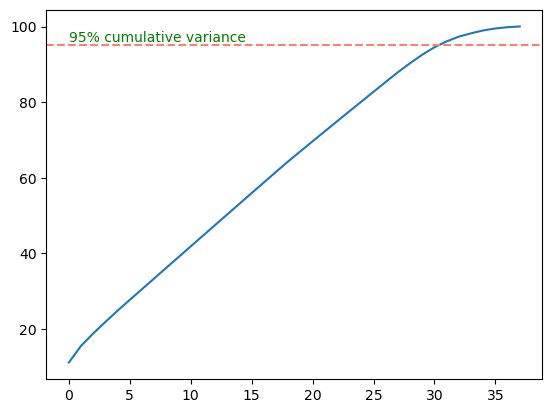

In [115]:
plt.plot(var_cumsum);
plt.axhline(color='salmon', y = 95, linestyle = '--');
plt.text(0, 96,'95% cumulative variance', color='green');

## PCA analysis
colinearity is not very strong. Since upcoming model building will not use linear models, PCA data will not be used

## 6. model building
X_train_scaled, X_test_scaled, y_train, y_test

### KNN

In [116]:
knn_cls = KNeighborsClassifier() # n_neighbor = 5 by default

In [117]:
%%time
knn_cls.fit(X_train_scaled, y_train)

Wall time: 10.2 ms


KNeighborsClassifier()

### KNeighborsClassifier()
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [119]:
y_predict = knn_cls.predict(X_test_scaled)

#Take Time

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [120]:
###### model information after training
y_train_predict = knn_cls.predict(X_train_scaled)

print('training set accuracy score:', accuracy_score(y_train, y_train_predict))
print('test set accuracy score:', accuracy_score(y_test, y_predict))
print('training set recall score:', recall_score(y_train, y_train_predict, average='macro'))
print('test set recall score:', recall_score(y_test, y_predict, average='macro'))
print('training set precision score:', precision_score(y_train, y_train_predict, average='macro'))
print('test set precision score:', precision_score(y_test, y_predict, average='macro'))

#Take Time

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


training set accuracy score: 0.7534625
test set accuracy score: 0.62825
training set recall score: 0.7138221171093037
test set recall score: 0.5755264032261205
training set precision score: 0.7424381658129247
test set precision score: 0.5972783966272502


In [121]:
###### check classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.59      0.57      0.58      5799
           1       0.67      0.73      0.70     10635
           2       0.53      0.43      0.48      3566

    accuracy                           0.63     20000
   macro avg       0.60      0.58      0.58     20000
weighted avg       0.62      0.63      0.62     20000



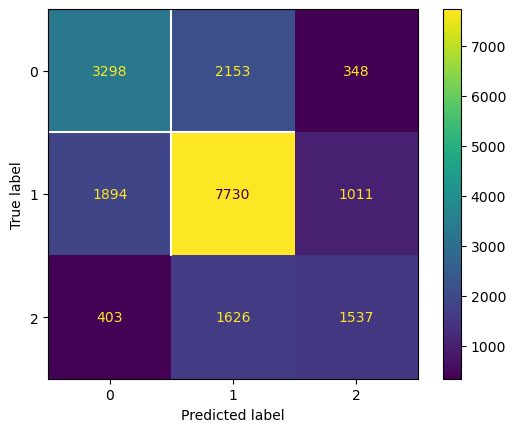

In [122]:
###### display confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_predict, values_format='d');
plt.grid(False)
plt.hlines(y=0.5, xmin=-0.5, xmax=1.5, colors='w',
           linestyles='solid', linewidth=1.5);
plt.vlines(x=0.5, ymin=-0.5, ymax=1.5, colors='w',
           linestyles='solid', linewidth=1.5);

## SVC

In [123]:
svc_cls = SVC(random_state=0)

In [124]:
%%time
svc_cls.fit(X_train_scaled, y_train)

Wall time: 21min 49s


SVC(random_state=0)

### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [125]:
y_predict = svc_cls.predict(X_test_scaled)

In [126]:
###### model information after training
y_train_predict = svc_cls.predict(X_train_scaled)

print('training set accuracy score:', accuracy_score(y_train, y_train_predict))
print('test set accuracy score:', accuracy_score(y_test, y_predict))
print('training set recall score:', recall_score(y_train, y_train_predict, average='macro'))
print('test set recall score:', recall_score(y_test, y_predict, average='macro'))
print('training set precision score:', precision_score(y_train, y_train_predict, average='macro'))
print('test set precision score:', precision_score(y_test, y_predict, average='macro'))

training set accuracy score: 0.6873125
test set accuracy score: 0.66515
training set recall score: 0.6979193551150825
test set recall score: 0.6721610784922026
training set precision score: 0.67004842769821
test set precision score: 0.6474475362559765


In [127]:
###### check classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.70      0.54      0.61      5799
           1       0.75      0.69      0.72     10635
           2       0.50      0.78      0.61      3566

    accuracy                           0.67     20000
   macro avg       0.65      0.67      0.65     20000
weighted avg       0.69      0.67      0.67     20000



## RandomForest

In [128]:
rfs_cls = RandomForestClassifier(random_state=0)

In [129]:
%%time
rfs_cls.fit(X_train_scaled, y_train)

Wall time: 20.8 s


RandomForestClassifier(random_state=0)

### RandomForestClassifier(random_state=0)
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.
y_predict = rfs_cls.predict(X_test_scaled)

In [130]:
y_predict = rfs_cls.predict(X_test_scaled)

In [131]:
###### model information after training
y_train_predict = rfs_cls.predict(X_train_scaled)

print('training set accuracy score:', accuracy_score(y_train, y_train_predict))
print('test set accuracy score:', accuracy_score(y_test, y_predict))
print('training set recall score:', recall_score(y_train, y_train_predict, average='macro'))
print('test set recall score:', recall_score(y_test, y_predict, average='macro'))
print('training set precision score:', precision_score(y_train, y_train_predict, average='macro'))
print('test set precision score:', precision_score(y_test, y_predict, average='macro'))

training set accuracy score: 1.0
test set accuracy score: 0.80635
training set recall score: 1.0
test set recall score: 0.7999610988501676
training set precision score: 1.0
test set precision score: 0.7956018833968308


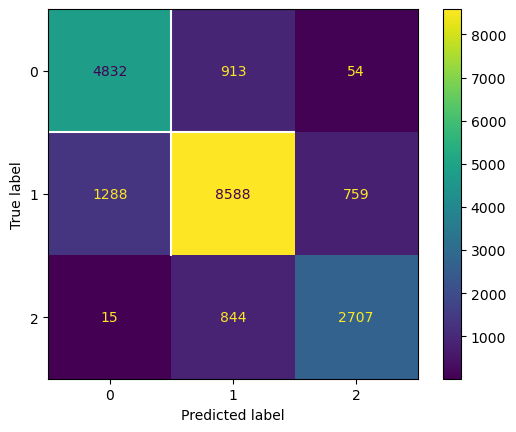

In [132]:
###### display confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_predict, values_format='d');
plt.grid(False)
plt.hlines(y=0.5, xmin=-0.5, xmax=1.5, colors='w',
           linestyles='solid', linewidth=1.5);
plt.vlines(x=0.5, ymin=-0.5, ymax=1.5, colors='w',
           linestyles='solid', linewidth=1.5);

### XGBClassifier 

In [133]:
xgb_cls = XGBClassifier(random_state=0)

In [134]:
%%time
xgb_cls.fit(X_train_scaled, y_train)

Wall time: 2.66 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [135]:
y_predict = xgb_cls.predict(X_test_scaled)

In [136]:
###### check classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76      5799
           1       0.80      0.79      0.79     10635
           2       0.68      0.73      0.70      3566

    accuracy                           0.77     20000
   macro avg       0.75      0.76      0.75     20000
weighted avg       0.77      0.77      0.77     20000



In [137]:
###### model information after training
y_train_predict = xgb_cls.predict(X_train_scaled)

print('training set accuracy score:', accuracy_score(y_train, y_train_predict))
print('test set accuracy score:', accuracy_score(y_test, y_predict))
print('training set recall score:', recall_score(y_train, y_train_predict, average='macro'))
print('test set recall score:', recall_score(y_test, y_predict, average='macro'))
print('training set precision score:', precision_score(y_train, y_train_predict, average='macro'))
print('test set precision score:', precision_score(y_test, y_predict, average='macro'))

training set accuracy score: 0.824475
test set accuracy score: 0.76595
training set recall score: 0.8210948945781542
test set recall score: 0.7553960355974821
training set precision score: 0.811630599868831
test set precision score: 0.7476655874321518
